# Kleinste kwadraten fit

## Een stelsel van vergelijkingen
Een stelsel van vergelijkingen kan exact opgelost worden wanneer het aantal vergelijkingen gelijk is aan het aantal onbekenden:
$$
 5x_1 + 7x_2 - 2x_3 = 60 \\
12x_1 - 2x_2 + 9x_3 = 35 \\
 2x_1 + 5x_2 + 4x_3 = 56
$$
We kunnen dit ook in matrixvorm schrijven:
$A @ x = y $
Hierbij is A de matrix met de coëfficiënten:
```
[[ 5  7 -2]
 [12 -2  9]
 [ 2  5  4]]
```
x bevat de drie onbekenden
```
[[x1]
 [x2] 
 [x3]]
```
y bevat de drie constanten
```
[[60]
 [35]
 [56]]
```
Om op te lossen naar x vermenigvuldigen we beide kanten met de inverse van A:
$A^{-1}Ax = A^{-1}y$

Of (aangezien $A^{-1}A$ gelijk is aan de identity matrix): $x= A^{-1}y$

Of in NumPy:

In [1]:
import numpy as np
A = np.array([[5, 7, -2], [12, -2, 9], [2, 5, 4]])
y = np.array([60, 35, 56]).reshape(-1, 1)
print("De coëfficiënten:")
print(A)
print("De kolommatrix y:")
print(y)
A_inv = np.linalg.inv(A)
x = A_inv @ y
print("De oplossing: ")
print(x)
print("controle:")
print(A@x)
#print(np.allclose(A@x, y))

De coëfficiënten:
[[ 5  7 -2]
 [12 -2  9]
 [ 2  5  4]]
De kolommatrix y:
[[60]
 [35]
 [56]]
De oplossing: 
[[2.]
 [8.]
 [3.]]
controle:
[[60.]
 [35.]
 [56.]]


## np.linalg.solve
- Bij de vorige oplossing moesten we wat wiskunde kennen
- Je moest weten dat je de inverse moest nemen van de matrix 1 en die moest vermenigvuldigen met y
- Maar numpy kan dat allemaal voor ons doen met np.linalg.solve:

In [2]:
A = np.array([[5, 7, -2], [12, -2, 9], [2, 5, 4]])
y = np.array([60, 35, 56])     #De reshape(-1, 1) is zelfs niet meer nodig
x = np.linalg.solve(A, y)
print(x)
print(np.allclose(A@x, y))

[2. 8. 3.]
True


En hoe zit het met de volgende gegevens?
```
A = np.array([[2, 8], [0.5, 2]])
y = np.array([18, 4.5]).reshape(-1, 1)
```
Dat geeft een fout:

LinAlgError: Singular matrix

Een *Singular matrix* is een matrix die geen inverse heeft. Het probleem is dat de tweede rij een veelvoud is van de eerste: rij2 = rij1 / 4. De tweede rij is *afhankelijk* van de eerste. In feite is dit een (1, 2) matrix. En alleen vierkante matrices (even veel rijen als kolommen) hebben een inverse. 

In [5]:
from numpy.linalg import LinAlgError
A = np.array([[2, 8], [0.5, 2]])
y = np.array([18, 4.5]).reshape(-1, 1)
try:
    x = np.linalg.solve(A, y)
except LinAlgError as error:
    print("Matrix heeft geen inverse:", error)

Matrix heeft geen inverse: Singular matrix


## De pseudoinverse van een matrix.
Naast de inverse kunnen we ook de *pseudoinverse* berekenen. De definitie van de pseudoinverse ($A^+$) is dat de volgende vergelijking waar is: $A @ A^+ @ A = A$

Dat komt er dus op neer dat $A @ A^+$ gelijk is aan de inverse van matrix A. We kunnen de pseudoinverse van A berekenen en die gebruiken om het stelsel op te lossen:

In [6]:
A = np.array([[2, 8], [0.5, 2]])
y = np.array([18, 4.5]).reshape(-1, 1)
print("De coëfficiënten:")
print(A)
print("De kolommatrix y:")
print(y)
A_pinv = np.linalg.pinv(A)
x = A_pinv @ y
print("De oplossing: ")
print(x)
print("controle:")
print(A@x)

De coëfficiënten:
[[2.  8. ]
 [0.5 2. ]]
De kolommatrix y:
[[18. ]
 [ 4.5]]
De oplossing: 
[[0.52941176]
 [2.11764706]]
controle:
[[18. ]
 [ 4.5]]


## De betekenis van de pseudoinverse
Het is natuurlijk raar: als de inverse niet werkt, gebruik dan maar de pseudoinverse en dan krijg je toch een oplossing. Het probleem met de vorige vergelijking was dat er eigenlijk maar 1 vergelijking was met twee onbekenden:
$$2x_1 + 8x_2 = 18$$
Dit is de beschrijving van een rechte:
$$x_2 = 18/8 - x_1/4$$
of
$$x_2 = 2.25 - 0.25 * x_1$$
We zullen deze situatie eens vergelijken met een stelsel dat wel een oplossing heeft:
$$2x_1 + 8x_2 = 18 \\
x_1 + 2x_2 = 5$$
Hier zijn twee rechten gedefinieerd:
$$x_2 = 2.25 - 0.25 * x_1 \\
x_2 = 2.5 - 0.5 ¨x_1$$
De oplossing van het tweede stelsel is $x_1=1$ en $x_2=2$.

In de onderstaande plot zien we dat in het eerste geval de twee rechten samenvallen(er is er maar 1 getekend). Alle punten op die rechten vormen een oplossing

In het tweede geval snijden de rechten en is er maar 1 oplossing: het snijpunt (1,2)


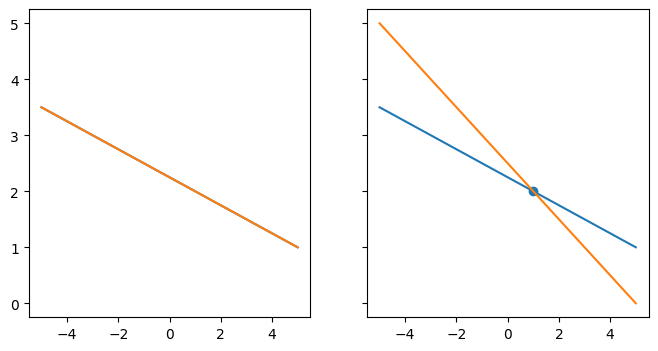

In [10]:
import matplotlib.pyplot as plt
def functie1(x):
  return 2.25 - 0.25 * x

def functie2(x):
  return 2.5 - 0.5 * x

x_as = np.linspace(-5, 5, 11)

fig, axes = plt.subplots(1, 2, sharey=True)
fig.set_size_inches(8, 4)
axes[0].plot(x_as, functie1(x_as))
axes[0].plot(x_as, functie1(x_as)) #dezelfde rechte

axes[1].plot(x_as, functie1(x_as))
axes[1].plot(x_as, functie2(x_as))
axes[1].scatter(1, 2)

plt.show()

Algemeen gesproken zoeken we met de *pseudoinverse* een oplossing die:
- voldoet aan de vergelijking ("op de rechte ligt")
- de vierkantswortel van $(Ax -y)^2$ minimaliseert/
Omdat de verschillen natuurlijk voor alle waarden op de rechte 0 zijn, is de uitkomst in feite een arteface van de manier waarop de pseudoinverse berekend wordt.

## Werkt de pseudoinverse altijd?
Hoe zit het met het volgende stelsel:
 $$2x_1 + x_2 = 7 \\
 2x_1 + x_2 = 9$$

In [16]:
A = np.array([[2, 1], [2, 1]])
y = np.array([7, 9]).reshape(-1, 1)
pseudo = np.linalg.pinv(A)
print('pseudo', pseudo, sep='\n')
x = pseudo @ y
print("x=", x, sep='\n')
print('Controle')
y_controle= pseudo @ x
print(y_controle)
print(np.allclose(y_controle, y))

pseudo
[[0.2 0.2]
 [0.1 0.1]]
x=
[[3.2]
 [1.6]]
Controle
[[0.96]
 [0.48]]
False


We zien dat we geen fout krijgen, maar het resultaat is niet correct. Wanneer we het resultaat geometrisch bekijken, zien we het probleem: de beide rechten lopen parallel.

Het gevonden punt (3.2, 1.6) ligt exact in het midden tussen de twee rechten. Dat is een voorbeeld van het minimaliseren van de vierkantswortel van $(A@x -y)^2$.

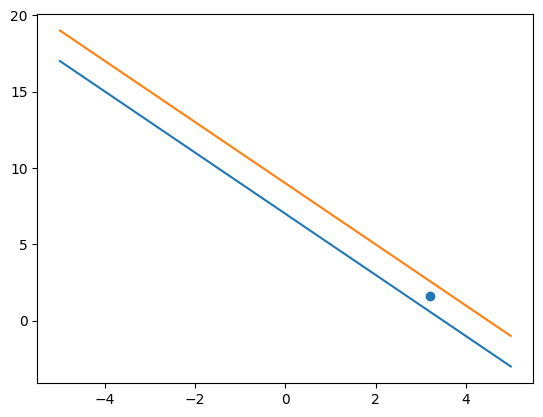

In [17]:
def functie1(x):
  return 7 - 2 * x

def functie2(x):
  return 9 - 2 * x

x_as = np.linspace(-5, 5, 11)

fig, ax = plt.subplots()
ax.plot(x_as, functie1(x_as))
ax.plot(x_as, functie2(x_as))
ax.scatter(3.2, 1.6)
plt.show()

## De "beste" oplossing
In het laatste voorbeeld was er geen exacte oplossing. De code leverde een "beste" oplossing op. Dit is het principe van de *lineaire kleinste kwadraten*-methode: we hebben een reeks vergelijkingen en er is geen exacte oplossing, maar we kunnen wel een oplossing vinden die het dichtste de oplossing van alle vergelijkingen benadert.

Dit kan gebruikt worden voor een stelsel met meer vergelijkingen dan onbekenden: een overgedetermineerd stelsel. Stel dat we de volgend informatie hebben:
- Wanneer we €1000  investeren in reclame, is de omzet €3273
- Wanneer we €2000 investeren in reclame is de omzet €4938
- Wanneer we €3000 investeren in reclame is de omzet €7358
De drie getallen liggen niet op een rechte, maar het scheelt niet veel. We kunnen echter wel de "beste" rechte berekenen: de afstand tussen de verschillende omzetcijfers en de rechte is zo klein mogelijk.

De algemene vorm van een rechte is: y = mx + c. Of in matrixvorm:
```
[3273       [1000
 4938 = m *  2000  + c
 7358]       3000]
```
of nog:
```
[3273    [[1000  1] @ [m
 4938  =  [2000  1]    c]
 7358]    [3000  1]
```
Wanneer we de matrices een naam geven ziet dat er als volgt uit: y = A @ mc.

Als dit een normale vergelijking zou zijn, kunnen we die als volgt oplossen: $A^{-1} @ y = mx$. Maar A is geen vierkante matrix, dus we kunnen nooit de inverse berekenen.

In de onderstaande code zien we de oplossing met de *pseudoinverse*. De coëffiënten zijn 2,0425 en 1104,66666666. Wanneer we de som van verschillen berekenen zien we dat dit (behoudens de afrondingsfouten van een float) gelijk is aan 0:

resultaat:
 [[   2.0425    ]
 [1104.66666667]]
m = 2.042500000000001
c = 1104.6666666666608
verschil berekend en echt: -1.2732925824820995e-11


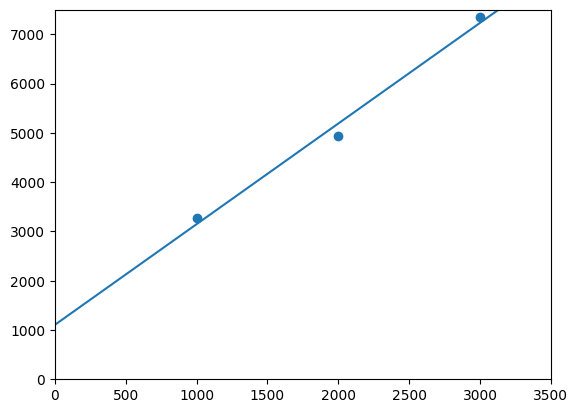

In [18]:
x = np.array([1000, 2000, 3000])
y = np.array([3273, 4938, 7358]). reshape(-1, 1)
A = np.vstack([x, np.ones(len(x))]).T

resultaat = np.linalg.pinv(A) @ y
print("resultaat:\n", resultaat)
m = resultaat[0, 0]  #2-dim array
c = resultaat[1, 0]
print("m =", m)
print("c =", c)
berekend =  A @ resultaat
print("verschil berekend en echt:", np.sum(berekend - y))
plt.scatter(x, y)
plt.axline((0, c), slope=m)  #lijn door (0, c) met een richtingscoëfficiënt(slope") m
plt.xlim(0, 3500)
plt.ylim(0, 7500)
plt.show()

## np.linalg.lstsq

De *pseudoinverse* gebruiken, is 1 manier om een kleinste kwadratenvergelijking op de te lossen. Numpy heeft een *lstsql()*-functie, die achter de schermen gebruik maakt van de *Singular Value Decomposition* (SVD) manier. Het belangrijkste verschil met *np.linalg.pinv* is dat we meer informati terugkrijgen.

Het eerste element van het resultaat bevat de waarden voor de coëfficiënten m en c:

(array([[   2.0425    ],
       [1104.66666667]]), array([95004.16666667]), np.int32(2), array([3.74165773e+03, 6.54653611e-01]))
m = 2.0425
c = 1104.6666666666624
verschil berekend en echt: -1.2732925824820995e-11


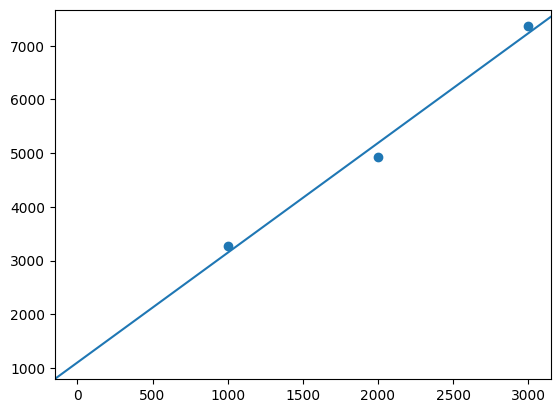

In [37]:
x = np.array([1000, 2000, 3000])
y = np.array([3273, 4938, 7358]). reshape(-1, 1)
A = np.vstack([x, np.ones(len(x))]).T

resultaat = np.linalg.lstsq(A, y, rcond=None)
print(resultaat)
m = resultaat[0][0,0]
c = resultaat[0][1,0]
print("m =", m)
print("c =", c)
berekend =  A @ resultaat[0]
print("verschil berekend en echt:", np.sum(berekend - y))
plt.scatter(x, y)
plt.axline((0, c), slope=m)
plt.show()

## returnwaarden van np.linalg.lstsq
De returnwaarde van np.linalg.lstsq() bevat meer dan de 2 coëfficiënten:
- resultaat[0] = [m, c]
- resultaat[1] = np.sum((berekend-y) **2) = de som van de kwadraten van de verschillen
- resultaat[2] = de "rank" van de matrix a = het aantal onafhankelijke kolommen van A (np.linalg.matrix_rank())
- resultaat[3] = de singular values van A; Dit is een resultaat van de Singular Value Decomposition techniek die gebruikt wordt om de least squares berekening uit te voeren

In [43]:
beta, residuals, rank, _  = resultaat
print(f'{rank=}')
#de voorspelde waarde door het model
y_hat = A @ beta
print('Theoretische waarden: ', y_hat, sep='\n')
#De verschillen tussen de echte waarden en de theoretische waarden
verschillen = y_hat - y
print("De verschillen:", verschillen, sep='\n')
#De som van de kwadratische verschillen:
kwadratisch_verschil = np.sum(verschillen**2)

print("De som van de kwadratische verschillen: ", kwadratisch_verschil)
#controle
print(f'{residuals[0]=}')
#zijn ze gelijk?
print(f'{np.allclose(residuals[0], kwadratisch_verschil)}')






rank=np.int32(2)
Theoretische waarden: 
[[3147.16666667]
 [5189.66666667]
 [7232.16666667]]
De verschillen:
[[-125.83333333]
 [ 251.66666667]
 [-125.83333333]]
De som van de kwadratische verschillen:  95004.16666666667
residuals[0]=np.float64(95004.16666666594)
True
